In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np 
import matplotlib.image as mpimg

import seaborn as sns


from tqdm import trange
from functools import partial

import pickle as pkl

from core import train_agent
from agents import doubling_agent

%load_ext autoreload
%autoreload 2
SEED = 181731

# Create the network based on the actual map

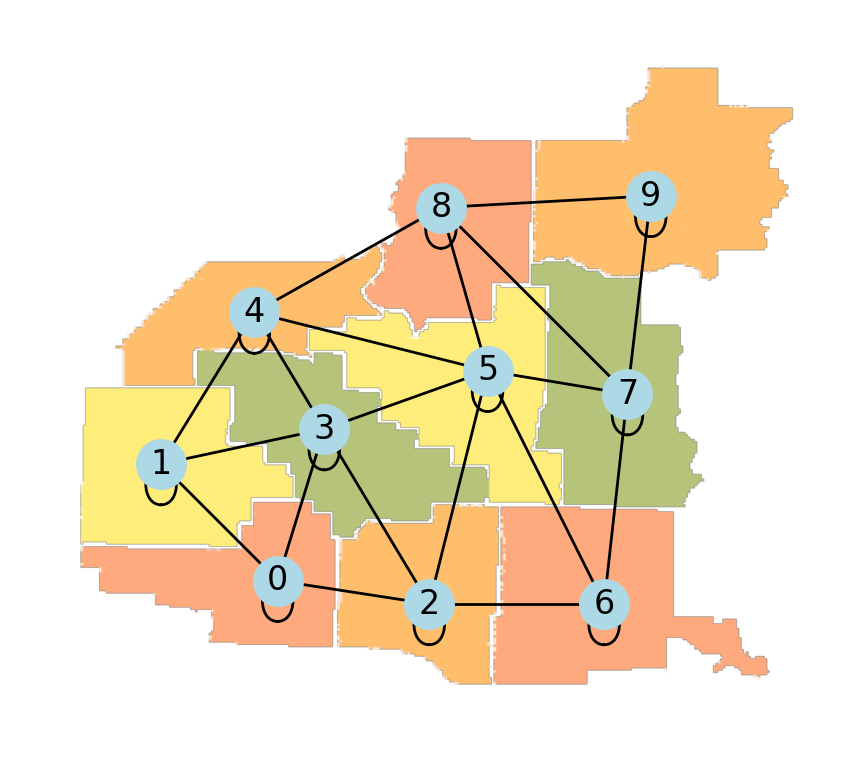

In [2]:
plt.figure(dpi=200)
img = mpimg.imread('Map.png')
imgplot = plt.imshow(img)

nodes_loc = np.array([(110,240),
                      (60,190),
                     (175,250),
                     (130,175),
                     (100,125),
                     (200,150),
                     (250,250),
                     (260,160),
                     (180,80),
                     (270,75)])

plt.scatter(nodes_loc[:,0],nodes_loc[:,1])
    
G = nx.Graph()

G.add_edges_from([(i,i) for i in range(len(nodes_loc))])
G.add_edges_from([(0,1),
                 (0,2),
                 (0,3),
                 (1,3),
                 (1,4),
                 (2,3),
                 (2,5),
                 (2,6),
                 (3,4),
                 (3,5),
                 (4,5),
                 (4,8),
                 (5,6),
                 (5,7),
                 (5,8),
                 (6,7),
                 (7,8),
                 (7,9),
                 (8,9)])
nx.draw(G,pos = nodes_loc,node_color='lightblue',labels={i:i for i in range(len(nodes_loc))})
    

# nx.draw(G,pos = nodes_loc,node_color='deepskyblue',node_size=12)
    
# plt.savefig('network.png')
plt.show()

### Define parameters

Define the following parameters:  
$\texttt{T}:$ game length  
$\texttt{n_samples}:$ number of games to run   
$\texttt{episodes}:$ number of episodes; Let this be 1 for now 
$\texttt{n_nodes}:$ number of nodes in graph. 
$\texttt{mu_size}:$ the node means are drawn as $\mu\sim \texttt{mu_size}\times \mathcal{N}(0,1)$   
$\texttt{sigma_size}:$ the node standard deviations are set to $\texttt{sigma_size}$ 
$\texttt{epsilon}:$ exploration parameter (only applicable for Q-learning algorithms)  
$\texttt{epsilon_discount}:$ exploration discount parameter (only applicable for Q-learning algorithms)  
$\texttt{algorithms}:$ the algorithms to run. 


 



In [18]:
T = 20000
n_samples = 100
episodes = 1
# G = return_graph('line',10)
n_nodes = len(G)
mu_size = 1
sigma_size = 1

# For Q-learning

epsilon = 0.9
epsilon_discount=0.99

init_node = 0

In [19]:
# means = np.random.normal(size=(n_samples,n_nodes))
np.random.seed(SEED)
means = np.random.uniform(low=0.5,high=9.5,size=(n_samples,n_nodes))

In [20]:
rewards = {}
regrets = {}

In [21]:
regrets['Our Algorithm'] = train_agent(n_samples,T,G,means,init_node,doubling_agent,parallelized=True)


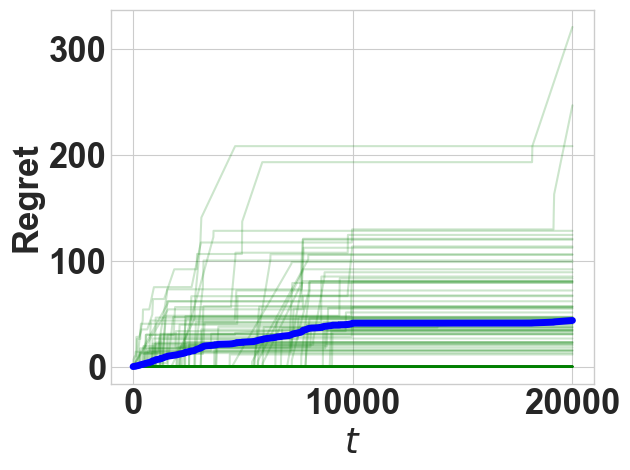

In [24]:
plt.figure(dpi=100)
plt.style.use('seaborn-whitegrid')
for i in range(100):
    plt.plot(np.cumsum(regrets['Our Algorithm'][i]),color='g',alpha=0.2)

plt.rc('font',weight='bold')
plt.plot(np.mean(np.cumsum(regrets['Our Algorithm'],axis=1),axis=0),c='b',linewidth=5,linestyle='solid',alpha=1)
plt.xlabel(r'$t$', fontsize=25,weight='bold')
plt.ylabel('Regret', fontsize=25,weight='bold')
plt.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('Figures/ApplicationRegret.png')